Attribute Information: <br>

Age Age<br>
Gender Gender<br>
BMI Body Mass Index<br>
Fever Fever<br>
Nausea/Vomting Nausea/Vomting<br>
Headache Headache<br>
Diarrhea Diarrhea<br>
Fatigue & generalized bone ache Fatigue & generalized bone ache<br>
Jaundice Jaundice<br>
Epigastric pain Epigastric pain<br>
WBC White blood cell<br>
RBC red blood cells<br>
HGB Hemoglobin<br>
Plat Platelets<br>
AST 1 aspartate transaminase ratio<br>
ALT 1 alanine transaminase ratio 1 week<br>
ALT 4 alanine transaminase ratio 12 weeks<br>
ALT 12 alanine transaminase ratio 4 weeks<br>
ALT 24 alanine transaminase ratio 24 weeks<br>
ALT 36 alanine transaminase ratio 36 weeks<br>
ALT 48 alanine transaminase ratio 48 weeks<br>
ALT after 24 w alanine transaminase ratio 24 weeks<br>
RNA Base RNA Base<br>
RNA 4 RNA 4<br>
RNA 12 RNA 12<br>
RNA EOT RNA end-of-treatment<br>
RNA EF RNA Elongation Factor<br>
Baseline histological Grading Baseline histological Grading<br>
Baselinehistological staging Baselinehistological staging<br>

In [0]:
#import pandas
import pandas as pd
df = pd.read_csv('Discretization-Criteria.csv') #read_data set features
hvc = pd.read_csv('HCV-Egy-Data.csv')

In [0]:
hvc.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [0]:
#renaming
b = []
for i in hvc.columns:
  try:
    a = i.split()
    b.append("_".join(a))
  except:
    b.append(i)
hvc.columns = b
hvc.rename(columns={"Nausea/Vomting":"Nausea"},inplace=True)
hvc.head()

,Age,Gender,BMI,Fever,Nausea,Headache,Diarrhea,Fatigue_&_generalized_bone_ache,Jaundice,Epigastric_pain,WBC,RBC,HGB,Plat,AST_1,ALT_1,ALT4,ALT_12,ALT_24,ALT_36,ALT_48,ALT_after_24_w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [0]:

#checking info
hvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea                           1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue_&_generalized_bone_ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric_pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

In [0]:
#getting continuous and categorical columns info and seperating them
continuous =[]
categorical = []

for i in hvc.columns:
  print(hvc[i].value_counts())
  print("************************************")
  if len(hvc[i].value_counts()) >= 15:
    continuous.append(i)
  else:
    categorical.append(i)

56    58
33    56
39    54
36    51
43    51
47    51
32    50
53    49
41    48
34    48
38    48
59    48
51    47
58    47
49    47
37    46
54    46
57    46
52    45
60    45
45    45
44    45
55    44
35    44
61    40
42    40
40    37
48    37
50    36
46    36
Name: Age, dtype: int64
************************************
1    707
2    678
Name: Gender, dtype: int64
************************************
34    118
24    112
28    107
33    104
31    104
35    100
27     99
23     97
22     96
30     95
29     93
25     92
32     90
26     78
Name: BMI, dtype: int64
************************************
2    714
1    671
Name: Fever, dtype: int64
************************************
2    696
1    689
Name: Nausea, dtype: int64
************************************
1    698
2    687
Name: Headache, dtype: int64
************************************
2    696
1    689
Name: Diarrhea, dtype: int64
************************************
1    694
2    691
Name: Fatigue_&_generalized_bone_ache

In [0]:
#Changing type to category of categorical data
hvc[categorical] = hvc[categorical].astype('category')
categorical

['Gender',
 'BMI',
 'Fever',
 'Nausea',
 'Headache',
 'Diarrhea',
 'Fatigue_&_generalized_bone_ache',
 'Jaundice',
 'Epigastric_pain',
 'HGB',
 'Baseline_histological_Grading',
 'Baselinehistological_staging']

In [0]:
hvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              1385 non-null   int64   
 1   Gender                           1385 non-null   category
 2   BMI                              1385 non-null   category
 3   Fever                            1385 non-null   category
 4   Nausea                           1385 non-null   category
 5   Headache                         1385 non-null   category
 6   Diarrhea                         1385 non-null   category
 7   Fatigue_&_generalized_bone_ache  1385 non-null   category
 8   Jaundice                         1385 non-null   category
 9   Epigastric_pain                  1385 non-null   category
 10  WBC                              1385 non-null   int64   
 11  RBC                              1385 non-null   float64 
 12  HGB   

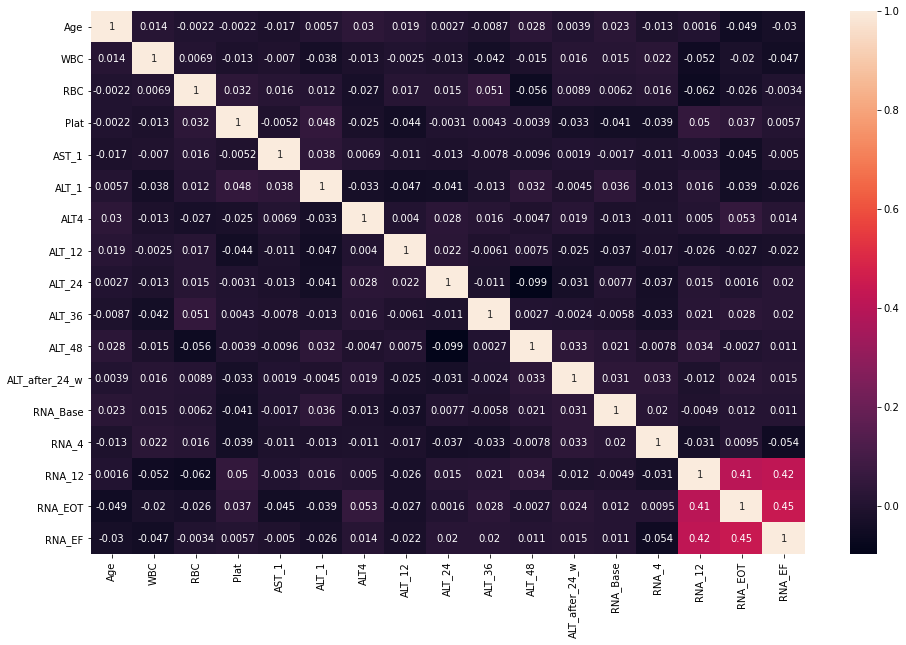

In [0]:
#corelation with continuous variable
import matplotlib.pyplot as plt
import seaborn as sns
a.append('Baselinehistological_staging')
b = hvc.corr().loc[continuous,continuous]
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(b,annot= True)

In [0]:
from scipy import stats
for i in categorical[0:-1]:
  crosstab = pd.crosstab(hvc[i],hvc.Baselinehistological_staging)
  print(stats.chi2_contingency(crosstab))
  print(crosstab)
  print("#"*120)

(6.670177942973433, 0.08318737457020528, 3, array([[171.51768953, 169.47581227, 181.2166065 , 184.7898917 ],
       [164.48231047, 162.52418773, 173.7833935 , 177.2101083 ]]))
Baselinehistological_staging    1    2    3    4
Gender                                          
1                             172  183  162  190
2                             164  149  193  172
########################################################################################################################
(41.16073623007327, 0.3761861288366202, 39, array([[23.28953069, 23.01227437, 24.60649819, 25.09169675],
       [23.53212996, 23.25198556, 24.86281588, 25.35306859],
       [27.17111913, 26.84765343, 28.70758123, 29.27364621],
       [22.31913357, 22.0534296 , 23.58122744, 24.04620939],
       [18.92274368, 18.69747292, 19.99277978, 20.38700361],
       [24.01732852, 23.73140794, 25.37545126, 25.87581227],
       [25.95812274, 25.64909747, 27.42599278, 27.966787  ],
       [22.56173285, 22.29314079, 23

In [0]:
new_data = pd.get_dummies(hvc, columns=categorical[0:-1], drop_first=True)
new_data

,Age,WBC,RBC,Plat,AST_1,ALT_1,ALT4,ALT_12,ALT_24,ALT_36,ALT_48,ALT_after_24_w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baselinehistological_staging,Gender_2,BMI_23,BMI_24,BMI_25,BMI_26,BMI_27,BMI_28,BMI_29,BMI_30,BMI_31,BMI_32,BMI_33,BMI_34,BMI_35,Fever_2,Nausea_2,Headache_2,Diarrhea_2,Fatigue_&_generalized_bone_ache_2,Jaundice_2,Epigastric_pain_2,HGB_11,HGB_12,HGB_13,HGB_14,HGB_15,Baseline_histological_Grading_4,Baseline_histological_Grading_5,Baseline_histological_Grading_6,Baseline_histological_Grading_7,Baseline_histological_Grading_8,Baseline_histological_Grading_9,Baseline_histological_Grading_10,Baseline_histological_Grading_11,Baseline_histological_Grading_12,Baseline_histological_Grading_13,Baseline_histological_Grading_14,Baseline_histological_Grading_15,Baseline_histological_Grading_16
0,56,7425,4248807.0,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,46,12101,4429425.0,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,57,4178,4621191.0,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,49,6490,4794631.0,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,59,3661,4606375.0,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,7044,4957174.0,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1381,55,6207,4636951.0,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1382,42,4913,4122038.0,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1383,52,7257,4241990.0,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
#scaling
for i in continuous:
  new_data[i] = new_data[i].apply(lambda x : x/(new_data[i].max()-new_data[i].min()) )

In [0]:
#Splitting data into test and train
X = new_data.drop(columns='Baselinehistological_staging')
Y = new_data.Baselinehistological_staging

In [0]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state = 5)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
log_predicted= logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(Y_test,log_predicted))

Classification Report: 
               precision    recall  f1-score   support

           1       0.22      0.21      0.21        67
           2       0.21      0.19      0.20        64
           3       0.20      0.28      0.23        64
           4       0.27      0.21      0.23        82

    accuracy                           0.22       277
   macro avg       0.22      0.22      0.22       277
weighted avg       0.23      0.22      0.22       277



#Decision Tree

In [0]:
#import libraries
from sklearn.tree import DecisionTreeClassifier

In [0]:
#fit into DcisionTreeClassifier()
Dtree = DecisionTreeClassifier(max_depth = 6)
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#predict dtree
D_pred = Dtree.predict(X_test)

In [0]:
#import libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
#print report
print(confusion_matrix(Y_test, D_pred))
print('Accuracy: \n', accuracy_score(Y_test,D_pred))
print('Classification Report: \n', classification_report(Y_test,D_pred))

[[14  7 23 23]
 [14  5 24 21]
 [ 8  9 27 20]
 [11  7 42 22]]
Accuracy: 
 0.24548736462093862
Classification Report: 
               precision    recall  f1-score   support

           1       0.30      0.21      0.25        67
           2       0.18      0.08      0.11        64
           3       0.23      0.42      0.30        64
           4       0.26      0.27      0.26        82

    accuracy                           0.25       277
   macro avg       0.24      0.24      0.23       277
weighted avg       0.24      0.25      0.23       277



#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
#applying randomforest classifier
R_f_c = RandomForestClassifier()
R_f_c.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
RF_pred = R_f_c.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(Y_test, D_pred)
print('Accuracy: \n', accuracy_score(Y_test,RF_pred))
print('Classification Report: \n', classification_report(Y_test,RF_pred))
confusion_matrix(Y_test, RF_pred)

Accuracy: 
 0.24548736462093862
Classification Report: 
               precision    recall  f1-score   support

           1       0.21      0.19      0.20        67
           2       0.25      0.23      0.24        64
           3       0.21      0.28      0.24        64
           4       0.32      0.27      0.29        82

    accuracy                           0.25       277
   macro avg       0.25      0.24      0.24       277
weighted avg       0.25      0.25      0.25       277



array([[13, 16, 26, 12],
       [13, 15, 21, 15],
       [17,  9, 18, 20],
       [18, 20, 22, 22]])

In [0]:
from sklearn.feature_selection import SelectFromModel

In [0]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [0]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [0]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Age', 'WBC', 'RBC', 'Plat', 'AST_1', 'ALT_1', 'ALT4', 'ALT_12',
       'ALT_24', 'ALT_36', 'ALT_48', 'ALT_after_24_w', 'RNA_Base', 'RNA_4',
       'RNA_12', 'RNA_EOT', 'RNA_EF'],
      dtype='object')


In [0]:
#applying randomforest classifier
R_f_c = RandomForestClassifier()
R_f_c.fit(X_train[selected_feat],Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
RF_pred = R_f_c.predict(X_test[selected_feat])

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(Y_test, D_pred)
print('Accuracy: \n', accuracy_score(Y_test,RF_pred))
print('Classification Report: \n', classification_report(Y_test,RF_pred))
confusion_matrix(Y_test, RF_pred)

Accuracy: 
 0.24548736462093862
Classification Report: 
               precision    recall  f1-score   support

           1       0.29      0.24      0.26        67
           2       0.19      0.16      0.17        64
           3       0.20      0.30      0.24        64
           4       0.31      0.28      0.29        82

    accuracy                           0.25       277
   macro avg       0.25      0.24      0.24       277
weighted avg       0.25      0.25      0.25       277



array([[16, 11, 26, 14],
       [13, 10, 20, 21],
       [13, 16, 19, 16],
       [13, 17, 29, 23]])